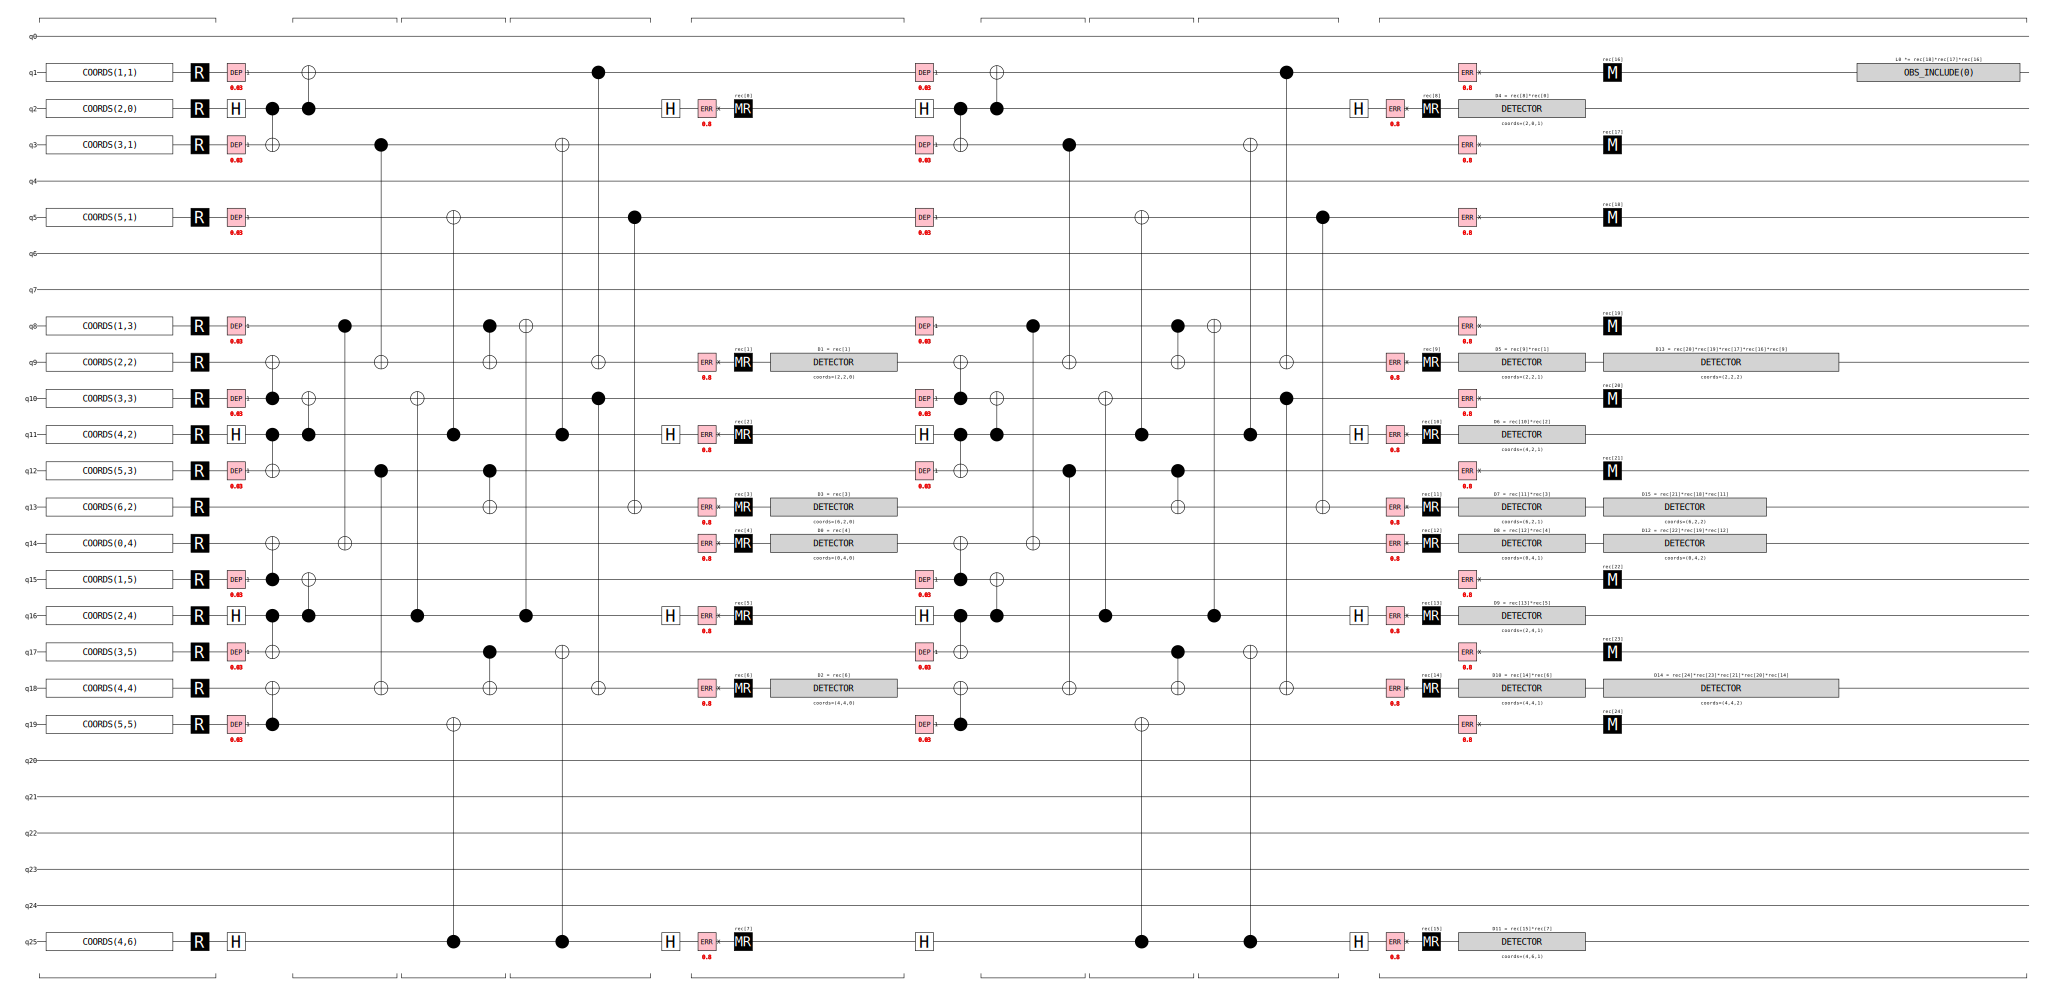

In [50]:
import stim
circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=2,
    distance=3,
    before_round_data_depolarization=0.03,
    before_measure_flip_probability=0.8)
# print(repr(circuit))
circuit.diagram("timeline-svg")


In [73]:
import pymatching
import sinter
from typing import *
def count_logical_errors(circuit: stim.Circuit, num_shots: int) -> int:
    num_detectors = circuit.num_detectors
    num_observables = circuit.num_observables

    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

    # Extract decoder configuration data from the circuit.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)

    # Run the decoder.
    predictions = sinter.predict_observables(
        dem=detector_error_model,
        dets=detection_events,
        decoder='pymatching',
    )

    # Count the mistakes.
    num_errors = 0
    for actual_flip, predicted_flip in zip(observable_flips, predictions):
        if not np.array_equal(actual_flip, predicted_flip):
            num_errors += 1
    return num_errors

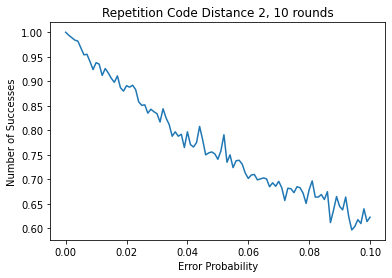

In [74]:
distance = 2
rounds = 10
num_shots = 1000
success_rate = []

error_probs = np.arange(0, 0.101, 0.001)

for p in error_probs:
    circuit = stim.Circuit.generated("repetition_code:memory", rounds=rounds, distance=distance, before_round_data_depolarization=p)
    num_logical_errors = count_logical_errors(circuit, num_shots)
    num_successes = num_shots - num_logical_errors
    success_rate.append(num_successes/float(num_shots))

plt.plot(error_probs, success_rate)
plt.xlabel('Error Probability')
plt.ylabel('Number of Successes')
plt.title(f'Repetition Code Distance {distance}, {rounds} rounds')
plt.show()

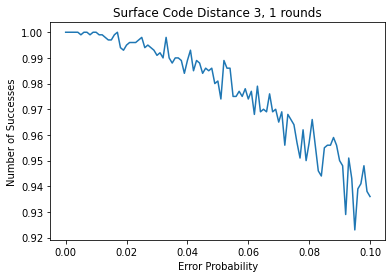

In [76]:
import matplotlib.pyplot as plt

distance = 3
rounds = 1
num_shots = 1000
success_rate = []

error_probs = np.arange(0, 0.101, 0.001)

for p in error_probs:
    circuit = stim.Circuit.generated("surface_code:rotated_memory_z", rounds=rounds, distance=distance, before_round_data_depolarization=p)
    num_logical_errors = count_logical_errors(circuit, num_shots)
    num_successes = num_shots - num_logical_errors
    success_rate.append(num_successes/float(num_shots))

plt.plot(error_probs, success_rate)
plt.xlabel('Error Probability')
plt.ylabel('Number of Successes')
plt.title(f'Surface Code Distance {distance}, {rounds} rounds')
plt.show()
